<a href="https://colab.research.google.com/github/Pavankuamr14/deeplearning/blob/main/Iris_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# lets apply our learning pratically at here

# we will try to build a deeplearning model that will predict the type of the flower with the iris dataset classification of the flowers

# The Iris dataset is a popular machine learning dataset

# The dataset has four feature variables about the flower
#      .  Sepal Length
#      .  Sepal Length
#      .  Petal Length
#      .  Petal Width


# The target class : Species, There are three classes here.
      #  . Setosa
      #  . Versicolor
      #  . Virginica

# our Goal is to build a deep learning model with Keras 2.0 predict the type of species


# lets start the process, By installing all the Dependencies

! pip install pandas
! pip install tensorflow
! pip install sklearn
! pip install matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


**Prepare Input Data for Deep learnin**

There are some following steps for preparing the data used for the training the models



1.   Load data into a pandas dataframe

2.   Convert the dataframe to a numpy array

3. Scale the feature dataset

4. use  one-hot-encoding for the target variable

5. Split into training and test datasets



In [81]:
# Import pandas library for data manipulation.
import pandas as pd

# Import numpy library for numerical operations.
import numpy as np

# Import tensorflow library for building deep learning models.
import tensorflow as tf

# Import os library for file system operations.
import os

# Import train_test_split function from sklearn for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split

# Import StandardScaler class from sklearn for standardizing data.
from sklearn.preprocessing import StandardScaler

In [82]:

# Load Data and review content
Iris_data = pd.read_csv('/content/drive/MyDrive/Ex_Files_Deep_Learning_Getting_Started/Ex_Files_Deep_Learning_Getting_Started/Exercise Files/iris.csv')

In [83]:
Iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [84]:
Iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
# if you observe the dataset , There we have the target values in string format , It is hard to use the string format because it more complex than comparing numeric values

# lets consider an example we have the Setosa
      #  . Versicolorof
      #  . Virginica
 # as target values as string ,  While humans can interpret string labels like “Setosa,” “Versicolor,” and “Virginica,” machine learning models require numerical representations.
 #  but it very hard Rather that we can convert these string to numeric values such as 1,2,3 we can easily determine relationship  that 2 is greater than 1 etc
 # Basically all machine learning use the numerical values for input features and target.


# So we  Use a Label encoder to convert string to numeric values


# for the target variable


# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()

# Iris_data['Sepcies'] = label_encoder.fit_transform(Iris_data['Species'])

# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# Iris_data['Species'] = label_encoder.fit_transform(
#                                 Iris_data['Species'])


from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the species names in the 'Species' column
Iris_data['Species'] = label_encoder.fit_transform(Iris_data['Species'])



In [86]:
# now you can see that Iris_data where target variables are encode
Iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [87]:
# we will convert input dataframe into a Numpy array which is preferred input formati for keras deep learning

np_iris = Iris_data.to_numpy()

# now we can see the input Dataframe that is changed into Numpy
np_iris


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [88]:
# NOw  we need to separate the data into feature variable and target variables into different variables


X_data = np_iris[:,0:4]
X_data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [89]:
Y_data = np_iris[:,-1]
Y_data.shape

(150,)

In [90]:
# Feature data of the first 5 rows and all columns form the X_data array
X_data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [91]:
# Similarly for the target variables Y_data

Y_data[:5]

array([0., 0., 0., 0., 0.])

In [92]:
# since the feature variables are numeric and each column may be on a different scale

# we need to standardize the scaling for this to range the range in between o to 1 or between range of two numbers

# we create a scalar model on teh data in next data. Then we transform the data in x data using this model

# since the target variable is multi-class we will use one hot encoding to create three columns with each column represnting a species.


# first create a scaler model that fit on the input data

scaler = StandardScaler().fit(X_data)

scaler



StandardScaler()

In [93]:
# scale the numerci feature variables

X_data = scaler.transform(X_data)

X_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [94]:
#  convert target variables as a one-hot-encoding array

Y_data = tf.keras.utils.to_categorical(Y_data,3)

Y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [95]:
#

X_data[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [96]:
Y_data[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [97]:
# Finally we need to split the data set into trainning and testing  dataset

# we allocat 10 % of the data set is allocated for testting

X_train, X_test, Y_train, Y_test = train_test_split( X_data, Y_data, test_size= 0.10)



In [98]:
X_train

array([[ 5.53333275e-01,  5.58610819e-01,  5.35408562e-01,
         5.27406285e-01],
       [ 3.10997534e-01, -1.05276654e+00,  1.04694540e+00,
         2.64141916e-01],
       [ 1.76501198e+00, -3.62176246e-01,  1.44480739e+00,
         7.90670654e-01],
       [ 5.53333275e-01, -1.28296331e+00,  7.05920842e-01,
         9.22302838e-01],
       [-1.73673948e-01, -1.05276654e+00, -1.46640561e-01,
        -2.62386821e-01],
       [-1.26418478e+00,  9.82172869e-02, -1.22655167e+00,
        -1.31544430e+00],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-9.00681170e-01,  5.58610819e-01, -1.16971425e+00,
        -9.20547742e-01],
       [-1.14301691e+00, -1.28296331e+00,  4.21733708e-01,
         6.59038469e-01],
       [ 3.10997534e-01, -5.92373012e-01,  5.35408562e-01,
         8.77547895e-04],
       [-2.94841818e-01, -1.31979479e-01,  4.21733708e-01,
         3.95774101e-01],
       [ 7.95669016e-01, -5.92373012e-01,  4.78571135e-01,
      

In [99]:
 X_test

array([[-1.50652052,  0.32841405, -1.34022653, -1.3154443 ],
       [ 0.31099753, -0.13197948,  0.47857113,  0.26414192],
       [-0.90068117,  1.70959465, -1.2833891 , -1.18381211],
       [-0.7795133 ,  0.78880759, -1.34022653, -1.3154443 ],
       [-0.05250608, -0.82256978,  0.76275827,  0.92230284],
       [ 1.03800476,  0.55861082,  1.10378283,  1.71209594],
       [ 1.03800476, -0.13197948,  0.8195957 ,  1.44883158],
       [-1.38535265,  0.32841405, -1.22655167, -1.3154443 ],
       [-0.41600969, -1.51316008,  0.02387172, -0.13075464],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [ 1.2803405 ,  0.32841405,  1.10378283,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [-0.7795133 ,  1.01900435, -1.2833891 , -1.3154443 ],
       [-0.41600969, -1.74335684,  0.13754657,  0.13250973],
       [-0.53717756,  1.93979142, -1.39706395, -1.05217993]])

In [100]:
 Y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

In [101]:
 Y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [102]:
# lets check the shape of the train and test datasets

X_train.shape

(135, 4)

In [103]:
X_test.shape

(15, 4)

In [104]:
Y_train.shape

(135, 3)

In [105]:
Y_test.shape

(15, 3)

In [106]:
# lets write all at once to check how data is changed
#Load Data and review content
iris_data = pd.read_csv("/content/drive/MyDrive/Ex_Files_Deep_Learning_Getting_Started/Ex_Files_Deep_Learning_Getting_Started/Exercise Files/iris.csv")

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head())

#Use a Label encoder to convert String to numeric values
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])
print(f" iris_data_after_label_encoder  {iris_data.head}")
#Convert input to numpy array
np_iris = iris_data.to_numpy()

#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]


print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Loaded Data :
------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
 iris_data_after_label_encoder  <bound method NDFrame.head of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0   

#creating a model

creating a model in keras requires defining the following

  1. Number of hidden layers
  2. Number of nodes in each layer
  3. Activation functions
  4. Loss Function and Accuracy measurement

*When we say we are creating a model in keras , we are merely defining the architecture and hyperparameterd for the neural network training of the model itsefl will happen later once a model is defined this way it can be trained and retrained for n number of times*

In [112]:
from tensorflow import keras


# Number of classes in the target variable is defined

NB_CLASSES = 3


# create a sequential model in keras

model = tf.keras.models.Sequential()

# Add the first hidden layer

model.add(keras.layers.Dense(128,                       # number of nodes
                             input_shape=(4,),          # number of input variables
                             name= "Hidden-Layer-1",    # logical name
                             activation='relu'))        # activation function

# we had the first hidden layer of 128 nodes This is a number we can experiment with as we improve with the model,
# since we known that we have for input variables(length of sepal, petal and width of the sepal and petal) we define the same here
# we can provide th a logival name for the layer. That is helpful. In printing th information late.
# we will user rectified linear unit activation for this layer


# Add the second hidden layer
model.add(keras.layers.Dense(128,
                            name='Hidden-Layer-2' , activation='relu'))

# we again added another hidden, Hidden-layer-2 we will again have 128 nodes and Activation function of relu



#Add an output layer with softmax activation

model.add(keras.layers.Dense(NB_CLASSES,
                             name = 'Output-layer',
                             activation= 'softmax'))


# finally we add the output layer here, The number of nodes will be equal to the number of classes in the target variables
# and we used soft max acctivation to predict the probablities of each class for input provider



#we will compile the model for the lost computation .we will use categorical cross entropy since this is a multi-class classification model
# we will also use accuracy as the metric to measure loss.There are a number of number of other parameter to compile the model
# Compile the model with loss and metrices
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy']
              )


# print the model meta-data
model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training and evaluation the model

**Training the model involves training models and then perform forward and back propagation**


 Training progress: 
 ---------------------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 69ms/step - loss: 0.8135 - accuracy: 0.6481 - val_loss: 0.4414 - val_accuracy: 0.9259
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5485 - accuracy: 0.7870 - val_loss: 0.3191 - val_accuracy: 0.9630
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.4491 - accuracy: 0.8333 - val_loss: 0.2630 - val_accuracy: 0.9630
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3964 - accuracy: 0.8333 - val_loss: 0.2185 - val_accuracy: 0.9630
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.3478 - accuracy: 0.8519 - val_loss: 0.1969 - val_accuracy: 0.9630
Epoch 6/10
7/7 [==============================] - 0s 15ms/step - loss: 0.3140 - accuracy: 0.8704 - val_loss: 0.1771 - val_accuracy: 0.9630
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2859 - accuracy: 0

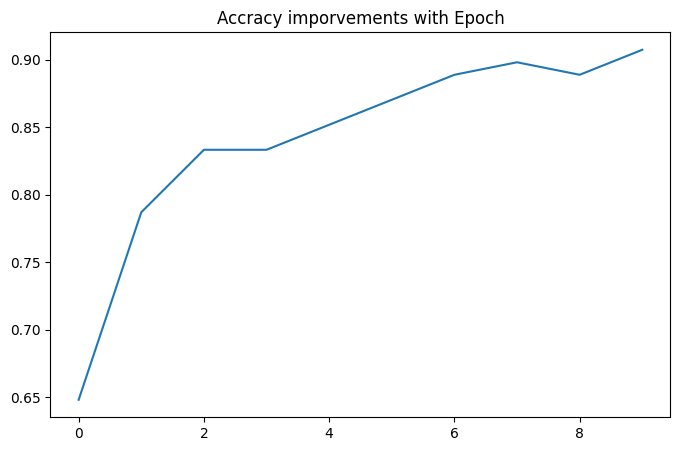


 Evalution against test dateaset :
----------------------------------------------
1/1 [==============================] - 0s 26ms/step - loss: 0.1803 - accuracy: 0.8667


[0.18032856285572052, 0.8666666746139526]

In [113]:
# right now will train our model and  evaluate the model
# Make it verbose so we can see the progress


VERBOSE=1
# set batch size

BATCH_SIZE = 16

# set number of epochs

EPOCHS= 10

# set validation split. 20 % of the training data will be use for validation

# after each epoch

VALIDATION_SPLIT=0.2


# tHIS  means that 20 percent of the training data will be used by keras for validation of each
# epoch though The recommended percentage of validation 10 we are using more samples since the total size is only 150


print ("\n Training progress: \n ---------------------------------------------------")


# fit the model. this will perform the entire training cycle, including
# forward propagation ,loss computation , backward progagation and gradient descent.
# Execute for the specified batch size and epoch
# perform validation after each epoch


history=model.fit( X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose= VERBOSE,

                    validation_split= VALIDATION_SPLIT)

import matplotlib.pyplot as plt

# plot accuarcy of the model after each epoch

pd.DataFrame(history.history)["accuracy"].plot(figsize= (8,5))


plt.title("Accracy imporvements with Epoch")

plt.show()



# Evaluate the model against the test dataset and print result
print("\n Evalution against test dateaset :\n----------------------------------------------")
model.evaluate(X_test,Y_test)



# Training a model is straight forward in kears with a single function .call the model.fit method is used to train and also caprure detaild about the training
# the first parameter is the input feature variable followed by the target variable
# THen we set value is for this for batch size , epoch ,  verbose and validation split
# this function will intialize the weight and biases performed gradient descent and store teh final weights and biases in the model.
# it also can expose the history of training as return value .
# we  use this history and plot accuracy of insample prediction against the epochs
# finally we will evalluate the model against the test data set and print the result


# Saving and Loading Models
The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [114]:
#Saving a model

model.save("iris_save")

#Loading a Model
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


1/1 [==============================] - 0s 326ms/step
Raw Prediction Output (Probabilities) : [[0.02420495 0.7181167  0.2576783 ]]
Prediction is  ['versicolor']


In [80]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)


Training Progress:
------------------------------------
Epoch 1/10
6/7 [========================>.....] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.